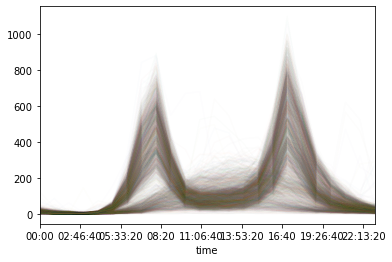

In [2]:
%matplotlib inline
from jupyterworkflow.data import get_freemont_data
data=get_freemont_data()
pivoted = data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.plot(legend=False,alpha=0.01);

In [6]:
X=pivoted.fillna(0).T.values
X.shape

(2524, 24)

In [11]:
from sklearn.decomposition import PCA
X2=PCA(2,svd_solver='full').fit_transform(X)

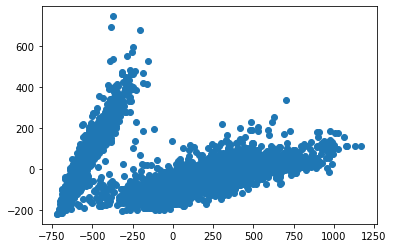

In [12]:
import matplotlib.pyplot as plt
plt.scatter(X2[:,0],X2[:,1])

In [13]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 0, 0, 1])

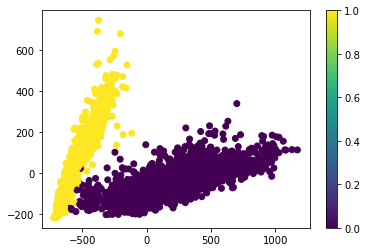

In [15]:
plt.scatter(X2[:,0],X2[:,1],c=labels)
plt.colorbar()

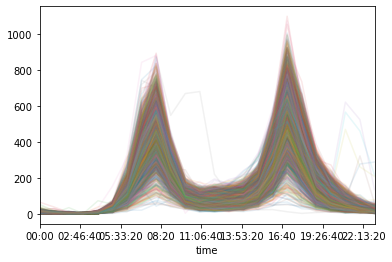

In [18]:
pivoted.T[labels==0].T.plot(legend=False,alpha=0.1)